In [47]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

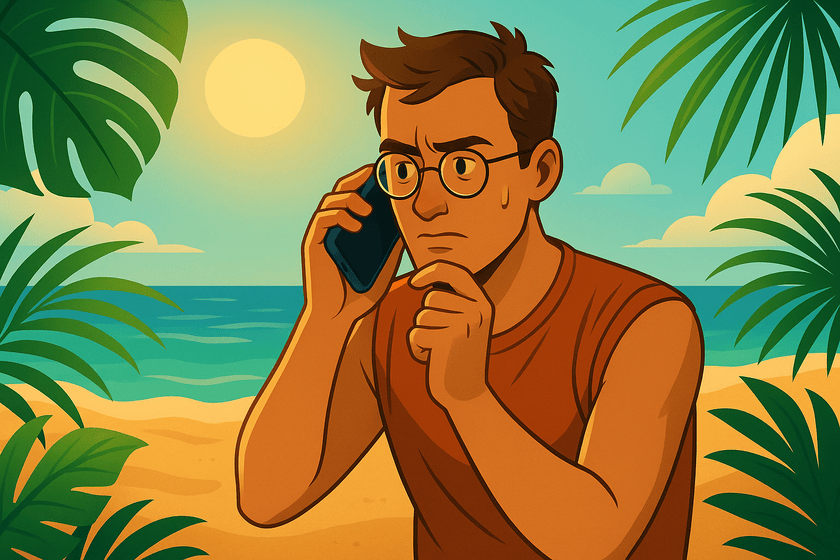

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?🍾✅
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)🍾✅
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)🍾✅
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)🍾✅
- Która zmienna oznacza predykowaną klasę?🍾✅
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)🍾✅
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)🍾✅

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)🍾✅
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)🍾✅
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)🍾✅
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych🍾✅
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)🍾✅
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków🍾✅

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [48]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# Właściwa część zadania

Zadanie zacznę od zapoznania się z danymi - przykładowe rekordy, statystyki danych, występowanie wartości brakujących, a także typy danych. Ze względu na istnienie oryginalnych danych w pliku zewnętrznym pozwoliłam sobie pracować na początkowo podanej zmiennej *titanic_df*.

(Aby podejmować decyzje o zostawianiu kolumn, podstawianiu pod NaN itd. tworzyłam wykresy jako komentarz i również tam je opisywałam. Ponieważ dopiero później doczytałam o konieczności wykresów dla każdej cechy pozwolę zostawić sobie tych kilka wykresów w komentarzach i dla czytelności nie kopiować ich do ostatniego paragrafu. Sorrki za kłopot)

## Przygotowanie danych

In [49]:
### Ogólne info:

#titanic_df.head()
#titanic_df.describe()
#titanic_df.describe(include='all')
#titanic_df.info()

In [50]:
### Ładne wykresiki
import matplotlib.pyplot as plt
import seaborn as sns

def nice_percentage_plot(df, group, count):
    smol = df[[group, count]]
    per = 100 * smol.groupby(group)[count].sum() / smol.groupby(group)[count].size()
    plt.bar(per.index, per.values, color='steelblue', edgecolor='black')
    plt.title(f'Percentage distribution of positive flag of variable {count} by {group}')
    plt.xlabel(f'{group}')
    plt.ylabel('Percentage')

def nice_hist(df, gram):
    plt.hist(df[gram])
    plt.title(f'Histogram of {gram}')
    plt.xlabel("Value")
    plt.ylabel("Frequency")


def nice_box (df, of):
    sns.boxplot(data = df[of], color = 'skyblue')
    plt.title(f"Distribution of {of} (boxplot)")
    plt.ylabel("Value")

def nice_scatter(df, xpoint, ypoint, type):
    if type == 'dd':
        alp = 0.1
    elif type == 'cd':
        alp = 0.4
    else:
        alp = 0.6
    sns.scatterplot(data = df, x = xpoint, y = ypoint, color='darkorange', alpha = alp)
    plt.title(f'{xpoint} vs {ypoint}')
    plt.xlabel(f'{xpoint}')
    plt.ylabel(f'{ypoint}')

In [51]:
'''
nice_percentage_plot(titanic_df, 'Embarked', 'Survived')
plt.show() #<- nie ma większych różnic w przeżywalności w zależności od portu, w którym rozpoczęto podróż, więc nie jest to istotna informacja w analizie
'''

"\nnice_percentage_plot(titanic_df, 'Embarked', 'Survived')\nplt.show() #<- nie ma większych różnic w przeżywalności w zależności od portu, w którym rozpoczęto podróż, więc nie jest to istotna informacja w analizie\n"

In [52]:
titanic_df = titanic_df.drop(columns = ['Name', 'Ticket', 'Embarked'])

Na samym starcie zacznę od usunięcia kolumny *Name* z finalnego zbioru danych, gdyż szanse na ucieczkę z tonącego statku nie zależą od imienia i nazwiska(mogą zależeć pośrednio, np. z nazwiskiem bogatego rodu mogą się wiązać pieniądze na wykupienie miejsc bliżej stref ewakuacji - jednak wtedy bezpośrednim czynnikiem będzie numer kabiny, a nie nazwisko). Podobna sytuacja ma się dla kolumny *Ticket*, więc ona również zostanie pominięta w dalszych analizach. Po rozważeniu, czy dla cechy *Embarked* istnieją jakieś trendy wiążące ją z predykowaną klasą *Survived*, postanowiłam również usunąć informację o porcie ze zbioru danych.

Potencjalnie niepotrzebną kolumną wydaje się także *Cabin*, jednak wymaga ona uprzedniego uporządkowania i oczyszczenia, aby wyciągnąć z niej jakiekolwiek wnioski.

### Korekta typów danych

In [53]:
### Zmiana typów na pythonowe
titanic_df = titanic_df.convert_dtypes()
#titanic_df.dtypes

In [54]:
### Sprawdzenie wszystkich możliwych wystąpień dla poszczególnych zmiennych
'''
options = []
for column in titanic_df:
    options.append(titanic_df[column].unique())
options
'''

'\noptions = []\nfor column in titanic_df:\n    options.append(titanic_df[column].unique())\noptions\n'

In [55]:
### Zamiana kodowania kolumny Sex na binary coding (tylko dwa przypadki występujące w całym zbiorze)
# 0 - male, 1 - female

titanic_df['Sex'] = titanic_df.Sex.map({
    'female': 1, 'male': 0
})
#titanic_df['Sex'].value_counts()

Ze względu na opisy konkretnych zmiennych żadna kolumna nie wymagała znaczącej zmiany typu danych. Jedyna poważna korekta nastąpiła dla pola *Sex*. Ponieważ te pole jest zmienną typu tekstowego występującą wyłącznie w formie dwóch wartości, zostało ono zmienione na format binary encoding (wartość 0 odpowiada wcześniejszej 'male', a 1 'female').

Pozostałe zmienne jakościowe nie wymagały korekty kodowań, gdyż domyślne kodowania zostały im poprawnie przypisane.

Cechy *SibSp* i *Parch* są zmiennymi ilościowymi dyskretnymi o niewielkiej liczbie kategorii, w związku z czym mogłyby zostać przekonwertowane na typ string i traktowane jako zmienne jakościowe porządkowe. Jednakże dla wygody własnej oraz przyszłych algorytmów preferujących typy liczbowe od tekstowych, zostawię te kolumny w obecnej postaci (i będę traktować je jako typ kategorialny).

### Porządkowanie braków danych

In [56]:
#titanic_df[titanic_df.isna().sum(axis=1) > 5]
#titanic_df[titanic_df.isna().sum(axis=0) > 800]
#titanic_df.columns[titanic_df.isna().sum(axis=0) > 0]

Zbiór danych nie zawiera żadnych całkowicie wybrakowanych kolumn, ani wierszy. Zmienne posiadające braki w danych to:
* *Age*,
* *Fare*,
* *Cabin*.

In [57]:
### Analiza kolumny Cabin
not_missing_cabins = titanic_df[titanic_df['Cabin'].notna()][['Survived', 'Cabin']]
not_missing_cabins['Multiple'] = not_missing_cabins['Cabin'].str.contains(" ")
not_missing_cabins['Cabin_type'] = not_missing_cabins['Cabin'].str[0]
wrong = (not_missing_cabins['Multiple'] == True) & (not_missing_cabins['Cabin_type'] == "F")
not_missing_cabins.loc[wrong, 'Cabin_type'] = not_missing_cabins.loc[wrong, 'Cabin'].str[2]
not_missing_cabins['Mysterious_F'] = wrong

nan_or_not_cabin = titanic_df[['Survived', 'Cabin']]
nan_or_not_cabin['Is_missing'] = nan_or_not_cabin['Cabin'].isna()

'''
nice_percentage_plot(not_missing_cabins, 'Cabin_type', 'Survived')
plt.show()  #<- w miarę równy rozkład, za wyjątkiem typu A, G i T - o wiele mniejsza przeżywalność
nice_percentage_plot(not_missing_cabins, 'Multiple', 'Survived')
plt.show()  #<- prawie identyczny rozkład, zatem można stwierdzić, że ilość kabin na jedną osobę nie miała wpływu na przeżywalność
nice_percentage_plot(nan_or_not_cabin, 'Is_missing', 'Survived')
plt.show()  #<- osoby z uzupełnioną kolumną Cabin o wiele częściej przeżywały w porównaniu do osób z brakami danych - ponieważ może być to jakaś zależność (np. brak uzupełnienia wynikał z niższej klasy lub pokładu) powinno się zostawić info o tym w jakiejś formie
'''

def cabin_numbers(cabin):
    single = cabin.split()
    numbers = []
    for part in single:
        number = ''.join([char for char in part if char.isdigit()])
        if number:
            numbers.append(int(number))
    return numbers
not_missing_cabins['Cabin_numbers'] = not_missing_cabins['Cabin'].apply(cabin_numbers)
'''
nice_hist(not_missing_cabins, 'Cabin_numbers')
plt.show()  #<- bardzo niewiele jest powtarzających się numerów. łącząc to z faktem, że samych uzupełnionych wartości jest niewiele, nie będzie to czynnik w żaden sposób determinujący przeżywalność, więc może on zostać pominięty
'''
titanic_df = titanic_df.drop(columns = ['Cabin'])
titanic_df['Cabin_type'] = not_missing_cabins['Cabin_type']
titanic_df['Cabin_type'] = titanic_df['Cabin_type'].fillna('Unknown')
titanic_df['Cabin_type'] = titanic_df.Cabin_type.map({
    'T': 8, 'G': 7, 'F': 6, 'E': 5, 'D': 4, 'C': 3, 'B': 2, 'A': 1, 'Unknown': 0
})


C:\Users\olaol\AppData\Local\Temp\ipykernel_20120\3286106119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_or_not_cabin['Is_missing'] = nan_or_not_cabin['Cabin'].isna()


Na początku zaczęłam od najbardziej wybrakowanej kolumny - kolumny Cabin. Prawie 7/9 wszystkich danych to wartości brakujące, co, ze względu na swój ogrom, może stanowić trudność w uzupełnianiu. W związku z tym zaczęłam się zastanawiać, czy w takim razie istnieje potrzeba istnienia kolumny Cabin w finalnym zbiorze danych. Jednakże analizy pokazały, iż istnieją duże różnice w statystycznej przeżywalności ze względu na brak danych lub uzupełniony numer kabiny, a także ze względu na grupę kabiny(oznaczoną jako literka). W takim wypadku postanowiłam dodać kolumnę *Cabin_type* będącą kopią *Cabin*, ale w zmienionej formie - skróciłam rekordy wyłącznie do literki (dla kilku wyjątkowych sytuacji, gdzie występowało wiele kabin na jednym bilecie, które nie należały do tej samej grupy, wybrałam tą kabinę, która miała podane bardziej szczegółowe dane (założyłam, że istnienie kabiny z samą literą, bez cyfry było pomyłką)), a wartości brakujące zastąpiłam napisem "Unknown". Następnie zamieniłam napisy na liczby dla ułatwienia dalszej analizy. Kolumnę *Cabin* finalnie usunęłam ze zbioru danych, gdyż wszystkie litery dostały swoją osobną kolumnę, zaś liczby, ze względu na swoje duże rozdrobnienie, nie przynosiłyby większej przydatności w dalszej analizie.

In [58]:
### Funkcja zamieniająca braki danych na losowe elementy z rozkładu
def get_rid_of_na_by_column_distribution(df, column):
    count_prob = df[column].value_counts(normalize=True)
    values = count_prob.index
    probs = count_prob.values
    missing_vals = df[column].isna()
    df.loc[missing_vals, column] = np.random.choice(values, size=missing_vals.sum(), p=probs)
    return df

In [59]:
### Analiza kolumny Age
#titanic_df['Age'].isna().value_counts()
titanic_df = get_rid_of_na_by_column_distribution(titanic_df, 'Age')

adultery = (titanic_df['Age'] >= 18)
titanic_df['Is_adult'] = adultery
titanic_df['Is_adult'] = titanic_df['Is_adult'].astype(int)

'''
nice_hist(titanic_df, 'Age')
plt.show()  #<- pomijając przód, wykres przypomina wykres prawostronnie skośny

nice_hist(titanic_df[titanic_df['Is_adult']], 'Age')
plt.show()  #<- po usunięciu przedniej części nieletnich osób, wykres rzeczywiście stał się prawostronnie skośny - świadczy to o dużej popularności rejsu wśród młodych ludzi
nice_hist(titanic_df[titanic_df['Is_adult'] == 0], 'Age')
plt.show()  #<- co ciekawe, histogram dzieci nie jest aż tak uporządkowany - wzrost w występowaniu występuje tylko wśród starszych nastolatków (najprawdopodobniej dlatego, iż w tamtych czasach mogły być traktowane bardziej jak dorośli niż obecnie), a także noworodków (możliwe, że ze względu na łatwość ich transportowania, a także poczucie "nowego startu")

age_col = titanic_df[['Age', 'Survived']]
nice_percentage_plot(age_col, 'Age', 'Survived')
plt.show()  #<- procentowy rozkład przeżycia nie wskazuje jednak na występowanie żadnej zależności pomiędzy wiekiem, a przeżywalnością. istnieją poszczególne przypadki, które pokazują wysoki lub niski procent, jednak nie da się zauważyć istnienia żadnego wyraźnego trendu
baby_col = titanic_df.loc[titanic_df['Age'] < 2, ['Age', 'Survived']]
nice_percentage_plot(baby_col, 'Age', 'Survived')
plt.show()  #<- z ciekawości spojrzałam jeszcze na wykres tylko dla małych dzieci, ze względu na stackujące się występowania i jednak da się wysnuć mały "trend" - małe dzieci (takie, które da się zabrac na rekach) miały większe szanse przeżycia
'''

'\nnice_hist(titanic_df, \'Age\')\nplt.show()  #<- pomijając przód, wykres przypomina wykres prawostronnie skośny\n\nnice_hist(titanic_df[titanic_df[\'Is_adult\']], \'Age\')\nplt.show()  #<- po usunięciu przedniej części nieletnich osób, wykres rzeczywiście stał się prawostronnie skośny - świadczy to o dużej popularności rejsu wśród młodych ludzi\nnice_hist(titanic_df[titanic_df[\'Is_adult\'] == 0], \'Age\')\nplt.show()  #<- co ciekawe, histogram dzieci nie jest aż tak uporządkowany - wzrost w występowaniu występuje tylko wśród starszych nastolatków (najprawdopodobniej dlatego, iż w tamtych czasach mogły być traktowane bardziej jak dorośli niż obecnie), a także noworodków (możliwe, że ze względu na łatwość ich transportowania, a także poczucie "nowego startu")\n\nage_col = titanic_df[[\'Age\', \'Survived\']]\nnice_percentage_plot(age_col, \'Age\', \'Survived\')\nplt.show()  #<- procentowy rozkład przeżycia nie wskazuje jednak na występowanie żadnej zależności pomiędzy wiekiem, a przeży

Kontynuując temat brakujących wartości przeszłam do kolumny *Age*. Ze względu na to, że wartości brakujących jest nienajmniej, postanowiłam przypisać brakującym wartościom losowe wartości z rozkładu całej kolumny. Ponieważ histogram przypominał rozkład prawostronnie skośny, a po wykluczeniu dzieci ze zbioru byłby on nawet takim rozkładem, rozważałam zastosowanie dla dorosłych dominanty jako substytutu NaN, jednak ze względu na liczność braków (zastąpienie NaN dominantą zwiększyłoby liczność dominanty o około 100%) postanowiłam rozdystrybuować wartości bardziej "po równo".

Ze względów praktycznych postanowiłam wydzielić z kolumny *Age* zmienną *Is_adult* będącą flagą, czy dana osoba jest dorosłym, czy jeszcze nie.

In [60]:
### Analiza kolumny Fare
#titanic_df['Fare'].isna().value_counts()
titanic_df = get_rid_of_na_by_column_distribution(titanic_df, 'Fare')

'''
nice_hist(titanic_df, 'Fare')
plt.show()  #<- jak widać głównie występują niewielkie opłaty mieszczące się w granicach 100 jednostkach waluty?
nice_percentage_plot(titanic_df, 'Fare', 'Survived')
plt.show()  #<- nie widać żadnego ogólnego trendu pomiędzy przeżywalnością, a ceną biletu, więc postanowiłam przyjrzeć się dwóm "skupiskom" - wyjątkowym wysokim płatnościom i nagromadzeniu niskich kwot. odstającą wartość 500 pominęłam dla czytelności

fare_big = titanic_df[(titanic_df['Fare'] < 300) & (titanic_df['Fare'] > 99)]
nice_percentage_plot(fare_big, 'Fare', 'Survived')
plt.show()  #<- moim zdaniem nie da się stwierdzić konkretnego trendu, jednak zdecydowanie można stwierdzić, że przy wysokiej opłacie istniała spora szansa przeżywalności

fare_smol = titanic_df[titanic_df['Fare'] < 100]
nice_hist(fare_smol, 'Fare')
plt.show()  #<- moim pierwszym pomysłem na uzupełnienie wartości brakujących było zastąpienie ich dominantą(prawoskośny wykres), jednak jak widać ze względu na duże zróżnicowanie w często występujących wartościach, zdecydowałam się na bardziej "sprawiedliwy" rozdział
nice_percentage_plot(fare_smol, 'Fare', 'Survived')
plt.show()  #<- ponownie żaden trend nie jest w szczególności widoczny, jednakże można zauważyć, że przy niskich opłatach istniała mniejsza szansa przeżywalności
'''

'\nnice_hist(titanic_df, \'Fare\')\nplt.show()  #<- jak widać głównie występują niewielkie opłaty mieszczące się w granicach 100 jednostkach waluty?\nnice_percentage_plot(titanic_df, \'Fare\', \'Survived\')\nplt.show()  #<- nie widać żadnego ogólnego trendu pomiędzy przeżywalnością, a ceną biletu, więc postanowiłam przyjrzeć się dwóm "skupiskom" - wyjątkowym wysokim płatnościom i nagromadzeniu niskich kwot. odstającą wartość 500 pominęłam dla czytelności\n\nfare_big = titanic_df[(titanic_df[\'Fare\'] < 300) & (titanic_df[\'Fare\'] > 99)]\nnice_percentage_plot(fare_big, \'Fare\', \'Survived\')\nplt.show()  #<- moim zdaniem nie da się stwierdzić konkretnego trendu, jednak zdecydowanie można stwierdzić, że przy wysokiej opłacie istniała spora szansa przeżywalności\n\nfare_smol = titanic_df[titanic_df[\'Fare\'] < 100]\nnice_hist(fare_smol, \'Fare\')\nplt.show()  #<- moim pierwszym pomysłem na uzupełnienie wartości brakujących było zastąpienie ich dominantą(prawoskośny wykres), jednak jak w

Ostatnią kolumną z występującymi brakami danych jest *Fare*. Tutaj przypadków z brakami w danych jest niż dla kolumny *Age*, jednak liczba wciąż jest wystarczająco duża, aby lepszym rozwiązaniem było zastosowanie tej samej metody co dla przypadku wyżej.


## Analizy

Zacznę rozdział od porównania ze sobą wielu zmiennych, następnie przejdę do analiz dla poszczególnej nieomówionej wcześniej zmiennej.

In [61]:
titanic_variables = titanic_df.drop(columns = 'Survived')
titanic_cont = titanic_df[['Age', 'Fare']]
titanic_categ = titanic_variables.drop(columns = ['Age', 'Fare'])

### Wartości odstające oraz zależności między sobą

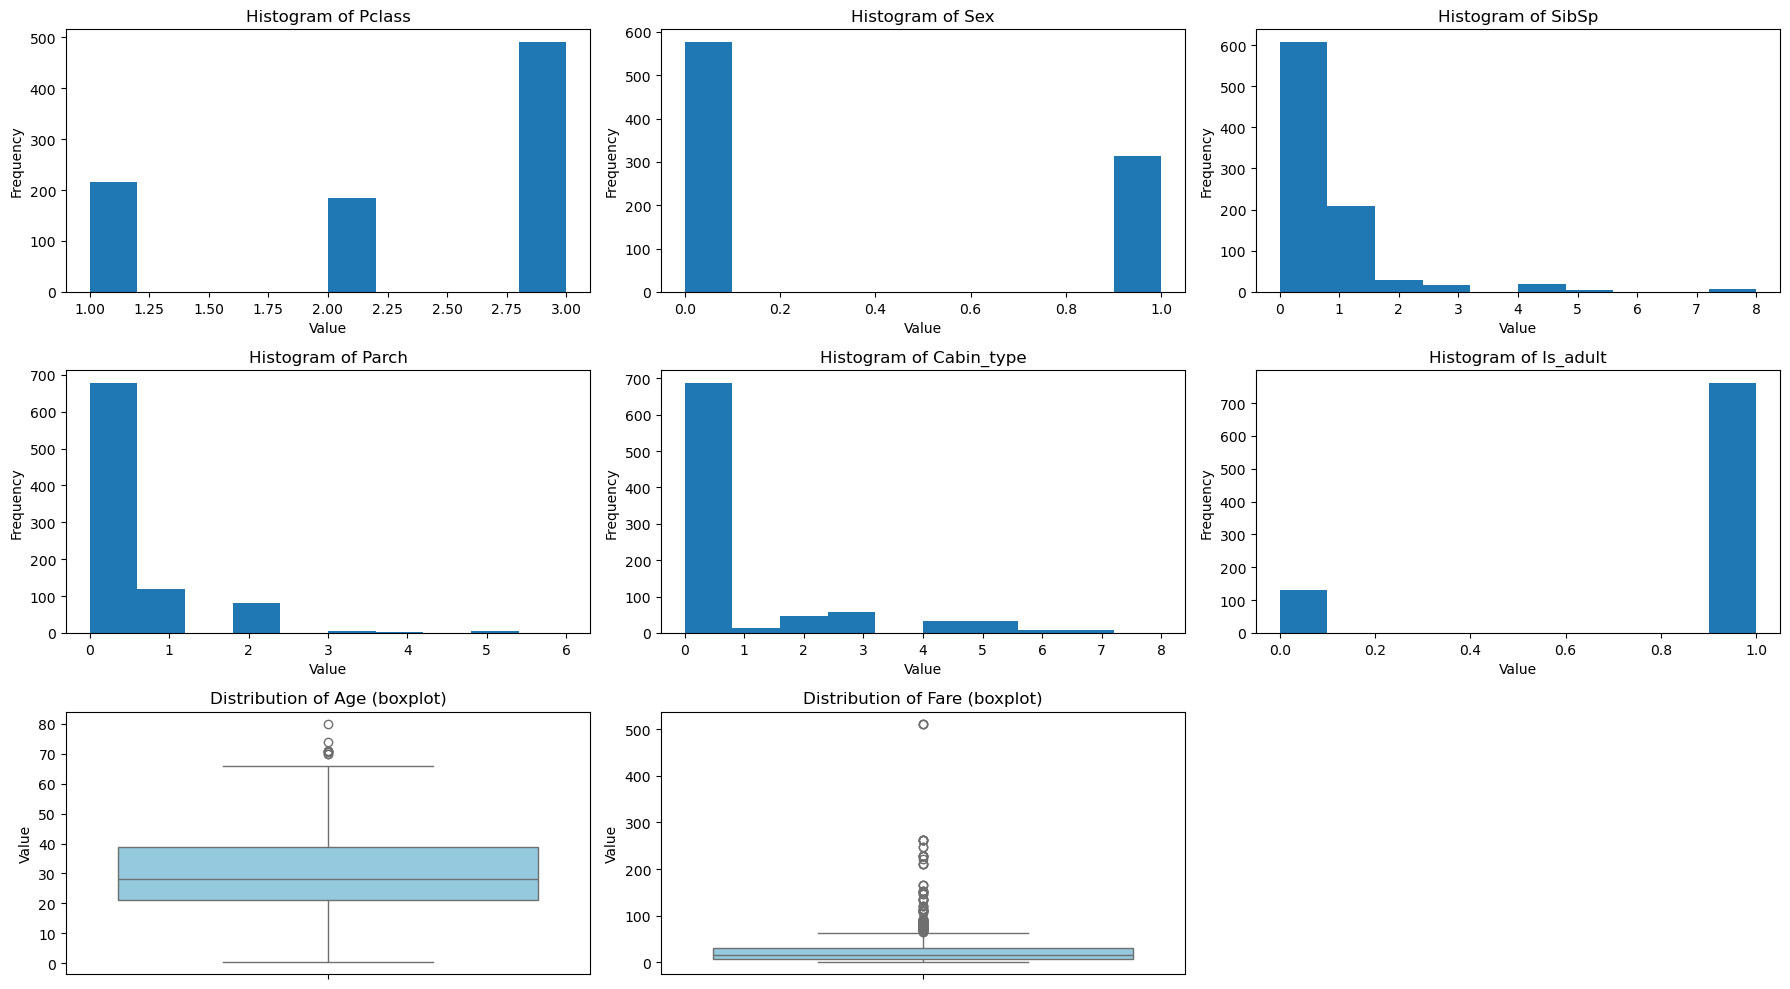

In [62]:
plt.figure(figsize=(18, 10))
counter = 1

for i in titanic_categ.columns:
    plt.subplot(3, 3, counter)
    nice_hist(titanic_categ, i)
    counter += 1

plt.subplot(3, 3, 7)
nice_box(titanic_df, 'Age')
plt.subplot(3, 3, 8)
nice_box(titanic_df, 'Fare')

plt.tight_layout()
plt.show()

Ze względu na niewielką ilość klas dla zmiennych jakościowych(a raczej ilościowych dyskretnych traktowanych jako jakościowe) postanowiłam użyć histogramów. Dla zmiennych ilościowych ciągłych użyłam wykresów pudełkowych. Z powyższych wykresów można wysnuć następujące wnioski:

* Jedynymi zmiennymi, które nie cechują się żadnymi wartościami odstającymi, są *Pclass*, *Sex* i *Is_adult*. Zmienne te posiadają niewiele wartości, przez co ciężko o odstawanie o ogółu.
* Zarówno *Parch* jak i *Cabin_type* cechują się ogromną ilością występowań wartości 0, przez co pozostałe wartości można uznać za odstające. Podobnie sytuacja ma się dla *SibSp*, jednak tym razem do większości można również zaliczyć wartość 1.
* Ponieważ kolumny *Age* i *Fare* są jedynymi zmiennymi typu liczbowego ciągłego, widoczny jest znaczący wzrost obserwacji odstających. Głównie dotyczy to *Age*, gdzie jako odstające traktowane są wartości już powyżej $\frac{1}{5}$ maksymalnej wartości.

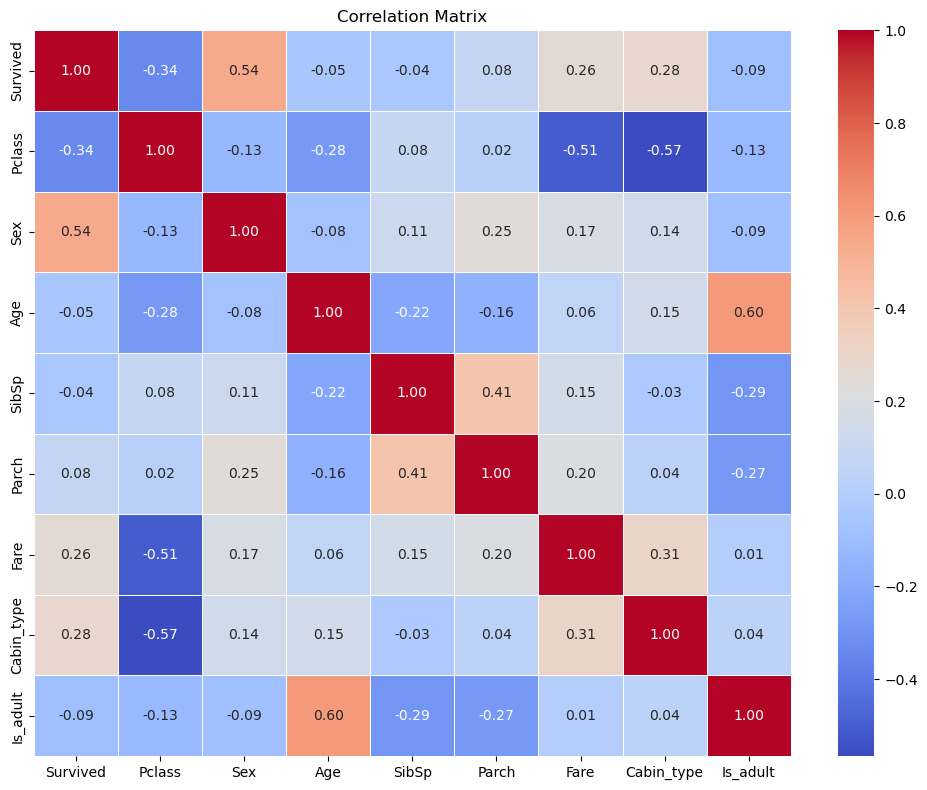

In [63]:
def plot_correlation_matrix(df):
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
plot_correlation_matrix(titanic_df)

Dzięki heatmapie możemy przyjrzeć się korelacji między poszczególnymi zmiennymi:

* Z oczywistych względów najwyższą dodatnią korelacje ma cecha *Age* z pochodną jej *Is_adult*.
* Co ciekawe kolejną najwyższą dodatnią korelację ma zmienna *Sex* ze zmienną predykowaną *Survived* - sugeruje to potrzebę skupienia się na bardziej szczegółowej wizualizacji dla tej pary, gdyż może to prowadzić do pewnych trendów w przeżywalności.
* Następny, wciąż stosunkowo wysoki wynik, osiąga *Parch* z *SibSp*. Nie istnieje jednak większa korelacja ze zmienną *Survived*. Może to sugerować, iż pasażerowie, którzy decydowali się podróżować z małżonkiem/rodzeństwem, decydowali się zabierać ze sobą pełen skład swoich rodzin (dzieci/rodziców).
* Zmienne *Cabin_type* *Fare* i *Survived* wykazują zauważalną korelację między sobą. Może wynikać to z tego, iż wybór typu kabiny zależał w dużej mierze od standardu jaki on zapewniał, a co za tym idzie, ceną jaką trzeba było za niego zapłacić. Okazuje się jednak, że za kosztami nie szły wyłącznie luksusy, gdyż miało to pewien wpływ na współczynnik przeżycia.
* Ostatnią dodatnią korelacją godną uwagi okazuje się ta pomiedzy *Parch*, a *Sex*. Może to wynikać z tego, iż jedna płeć była bardziej skłonna do zabierania ze sobą młodszych bądź starszych członków rodziny.
* Warto również zwrócić uwagę na wysokie ujemne korelacje - jedną z nich jest ta pomiędzy *Pclass*, a *Survived*. Dzięki temu możemy się domyślać, że niestety klasa, którą się podróżowało, miała spory wpływ na współczynnik przeżywalności.
* Kolejną zmienną o wysoce ujemnych korelacjach jest sama kolumna *Pclass*. Ma ona powiązania z *Age*, *Fare* i *Cabin_type*, co może wynikać z tego, iż osoby w różnym wieku miały różne zasoby pieniężne, a co za tym idzie, było je stać lub nie na zakup biletu w wyższej klasie.
* Również oczywistym powiązaniem jest to między zmienną *Is_adult*, a *SibSp* i *Parch* - dzieci z reguły podróżowały z rodzicami oraz rodzeństwem.

### Zależności dla poszczególnych zmiennych

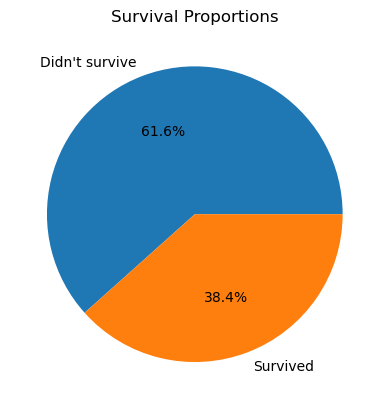

In [90]:
proportions = titanic_df['Survived'].value_counts()
label = ["Didn't survive", "Survived"]
plt.pie(x = proportions, labels = label, autopct = '%1.1f%%')
plt.title('Survival Proportions')
plt.show() 

Na wstępie chciałam podkreślić oryginalną wartość współczynnika przeżywalności. Niecałe 40% załogi statku przeżyło, co oznacza, że tylko wartości znacznie wyższe lub niższe od tego procentu będą miały potencjał na bycie zalążkiem pewnego trendu.

#### 1. *Pclass*

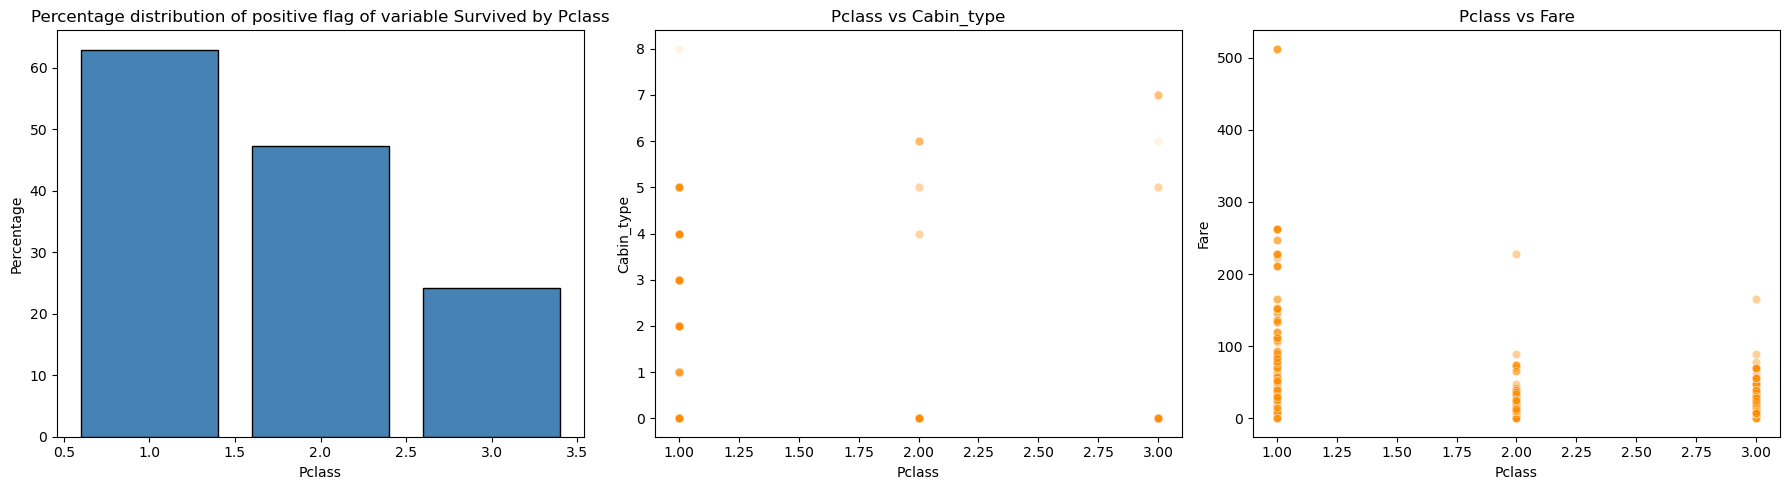

In [106]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
nice_percentage_plot(titanic_df, 'Pclass', 'Survived')
plt.subplot(1, 3, 2)
nice_scatter(titanic_df, 'Pclass', 'Cabin_type', "dd")
plt.subplot(1, 3, 3)
nice_scatter(titanic_df, 'Pclass', 'Fare', "cd")
plt.tight_layout()
plt.show()

Na pierwszym wykresie zdaje się utworzyć zauważalny trend. Niestety wychodzi na to, że im wyższa klasa, którą podróżowała dana osoba, tym wyższe prawdopodobieństwo na jej przetrwanie. Patrząc na to, że współczynnik przetrwania trzeciej, najliczniejszej klasy wynosi zaledwie około 25%, zostawia to czytelnika z bardzo przykrą refleksją.

Kontynuując analizę, wykresy rozrzutu potwierdzają hipotezę istenienia korelacji między *Pclass*, a *Cabin_type* i *Fare*. Możemy najprawdopodobniej założyć, że im mniejsza litera alfabetu(A = 1, B = 2, itd. na wykresie), tym był wyższy standard kabiny. Niestety w danych występowało wiele brakujących wartości, przez co nie jesteśmy w stanie upewnić się co do słuszności. W przypadku *Fare* jest to dość oczywista zależność - im wyższa klasa, tym więcej osób o wyższej cenie biletu. Da się jednak odnaleźć wyraźne obserwacje odstające.

#### 2. *Sex*

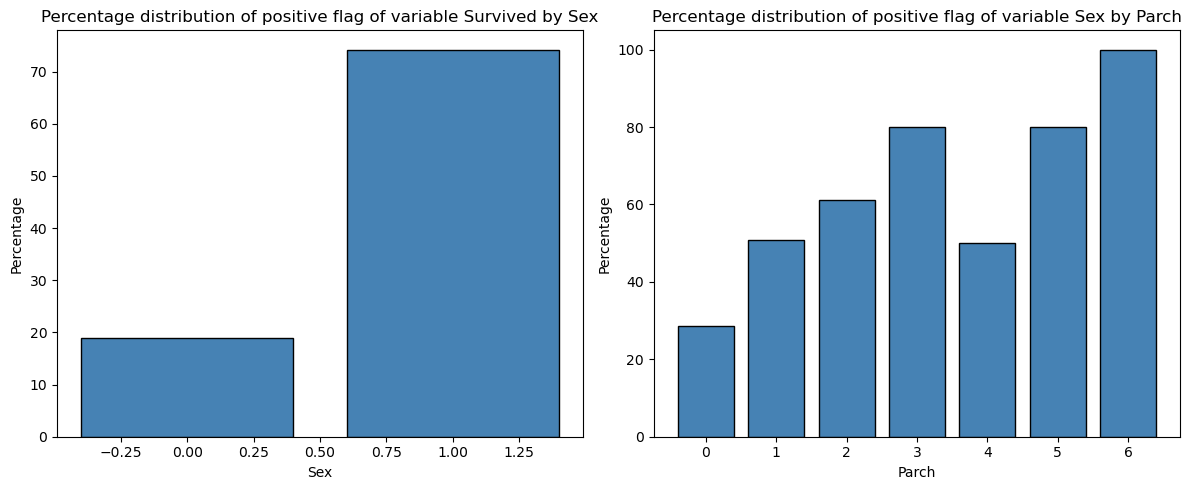

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
nice_percentage_plot(titanic_df, 'Sex', 'Survived')
plt.subplot(1, 2, 2)
nice_percentage_plot(titanic_df, 'Parch', 'Sex')
plt.tight_layout()
plt.show()

Tym razem również możemy zauważyć trend w przeżywalności. Okazuje się, że kobiety (wartość *Sex* równa 1) stanowiące zaledwie $\frac{1}{3}$ załogi, miały znacznie wyższą szansę na przetrwanie. Jest to o tyle ciekawe, że patrząc na drugi wykres, kobiety o wiele częściej podróżowały z rodziną (co najmniej jednym lub więcej dzieckiem/rodzicem) niż mężczyźni.

#### 3. *SibSp* i *Parch*

##### *SibSp*

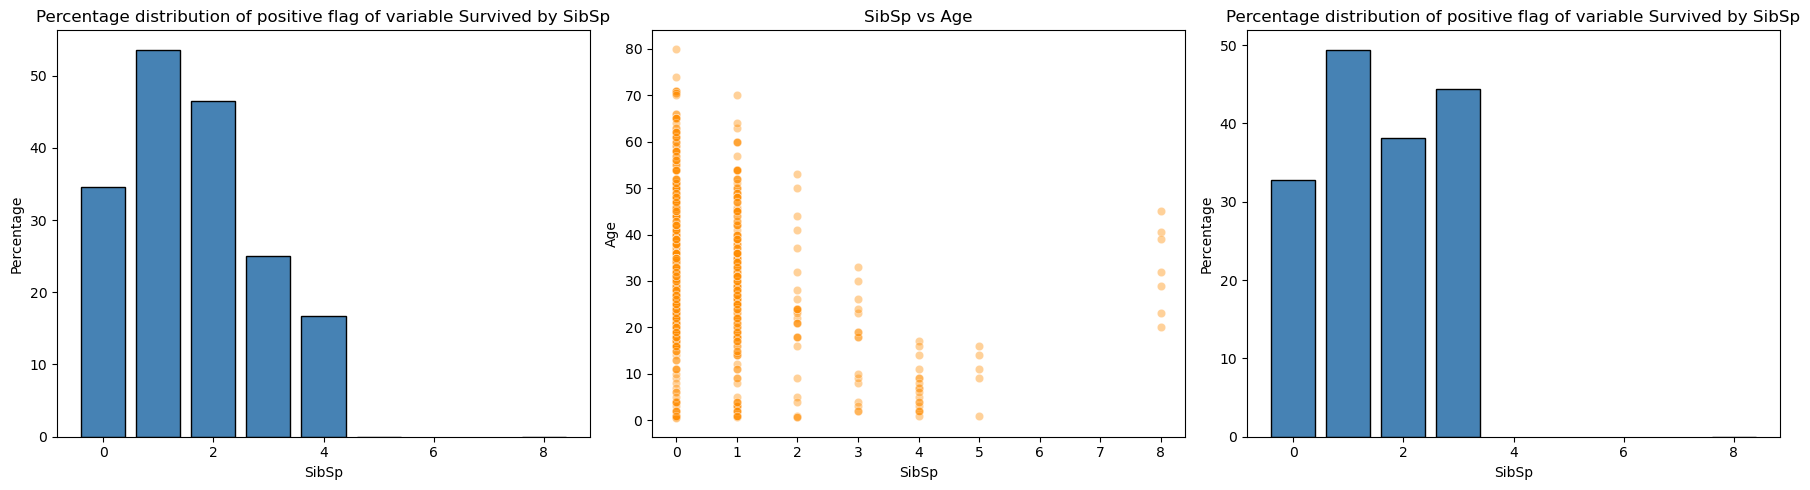

In [74]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
nice_percentage_plot(titanic_df, 'SibSp', 'Survived')
plt.subplot(1, 3, 2)
nice_scatter(titanic_df, 'SibSp', 'Age', "cd")
plt.subplot(1, 3, 3)
nice_percentage_plot(titanic_df[titanic_df['Is_adult'] == 1], 'SibSp', 'Survived')
plt.tight_layout()
plt.show()

Z wykresu rozkładu pokazanego w poprzednim rozdziale pamiętamy, że cechował się on prawostronną skośnością, a co za tym idzie - wysoką liczbą osób bez żadnego, lub tylko z jednym, rodzeństwem/małżonkiem. Potwierdza to również wykres rozrzutu wyżej - dla większej wartości zmiennej *SibSp* można gołym okiem zidentyfikować rodziny (raczej chodzi o rodzeństwo małych dzieci, co zdaje się potwierdzać trzeci wykres).

Niestety zgodnie z oczekiwaniami, nie jest zauważalny żaden pewny trend. Ze względu na wyższy współczynnik przeżywalności dla osób z jednym bądź dwoma rodzeństwem/małżonkami możemy spekulować, że osobom o małej liczbie osób do opieki było łatwiej przeżyć.

##### *Parch*

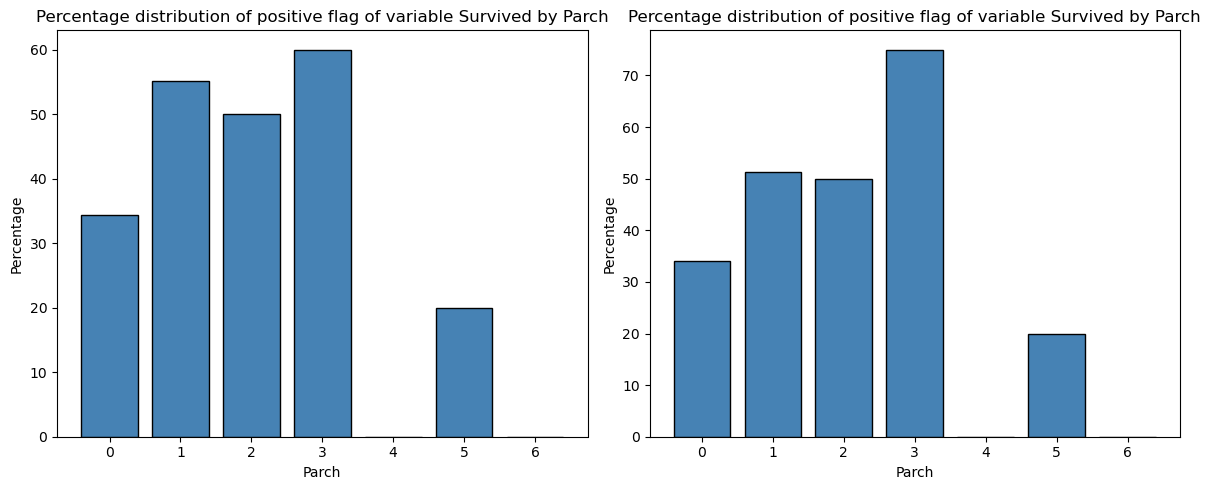

In [92]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
nice_percentage_plot(titanic_df, 'Parch', 'Survived')
plt.subplot(1, 2, 2)
nice_percentage_plot(titanic_df[titanic_df['Is_adult'] == 1], 'Parch', 'Survived')
plt.tight_layout()
plt.show()

Mimo że dzieci(część osób z Parch równym 1 lub 2) jest stosunkowo niewiele, da się zauważyć wyraźny spadek w przeżywalności wśród samych dorosłych(wykres z prawej) w porównaniu do wszystkich osób(wykres z lewej). Patrząc na ogólne wartości moglibyśmy spekulować, że im więcej dana osoba miała członków rodziny do uratowania, tym bardziej była skłonna do przeżycia Patrząc jednak na ogólny rozkład wartości *Parch*, wszystkie wartości poza 0 stanowią wyjątki, co czyni ten trend mało stosownym.

##### *SibSp* vs *Parch*

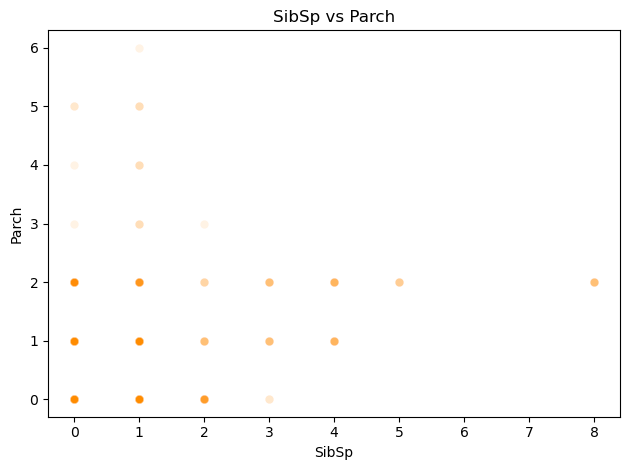

In [66]:
nice_scatter(titanic_categ, 'SibSp', 'Parch', "dd")
plt.tight_layout()
plt.show()

Ze względu na to, że *SibSp* i *Parch* wykazały na macierzy zauważalną korelację między sobą, postanowiłam porównać te dwie zmienne ze sobą za pomocą scatter plota. Moje wcześniejsze hipotezy odnośnie zabierania najbliższych rodzin zdają się potwierdzać - jest wiele osób które mają do dwóch rodziców/dzieci oraz do jednego małżonka/rodzeństwa.